In [2]:
from unsampled import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors

In [3]:
ebov =Tree.get(path="Makona_1610_MCC_full", schema="nexus")
name_nodes(ebov)
name_edges(ebov)

In [4]:
#y-plotting for the full tree
y_positions = y_dist_dict(ebov)

In [5]:
node_probs = calculate_cumulative_node_prob(ebov, 1)

In [6]:
edge_probs = pcoal_along_edge(ebov, 1)

In [7]:
#color map shifting
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#cmap = plt.get_cmap('Blues')
#new_cmap = truncate_colormap(cmap, 0.3, 1.0)
#cmap = mpl.cm.get_cmap(new_cmap)

cmap=mpl.cm.get_cmap('inferno_r')

mpl.rcParams['font.serif'] = "Latin Modern Roman"
mpl.rcParams['font.family'] = "serif"
#initialize some plotting settings
branchWidth= 1
lty = "-"
s = 10
y_ax = len(ebov.leaf_nodes())

#colors
unsamp = '#67001f' #'#ea8281' #plotting unsampled branches color
samp = '#053061' #'#020360' #plotting sampled branches


In [7]:
scale_fctr = max(edge_probs.values()) + .0001

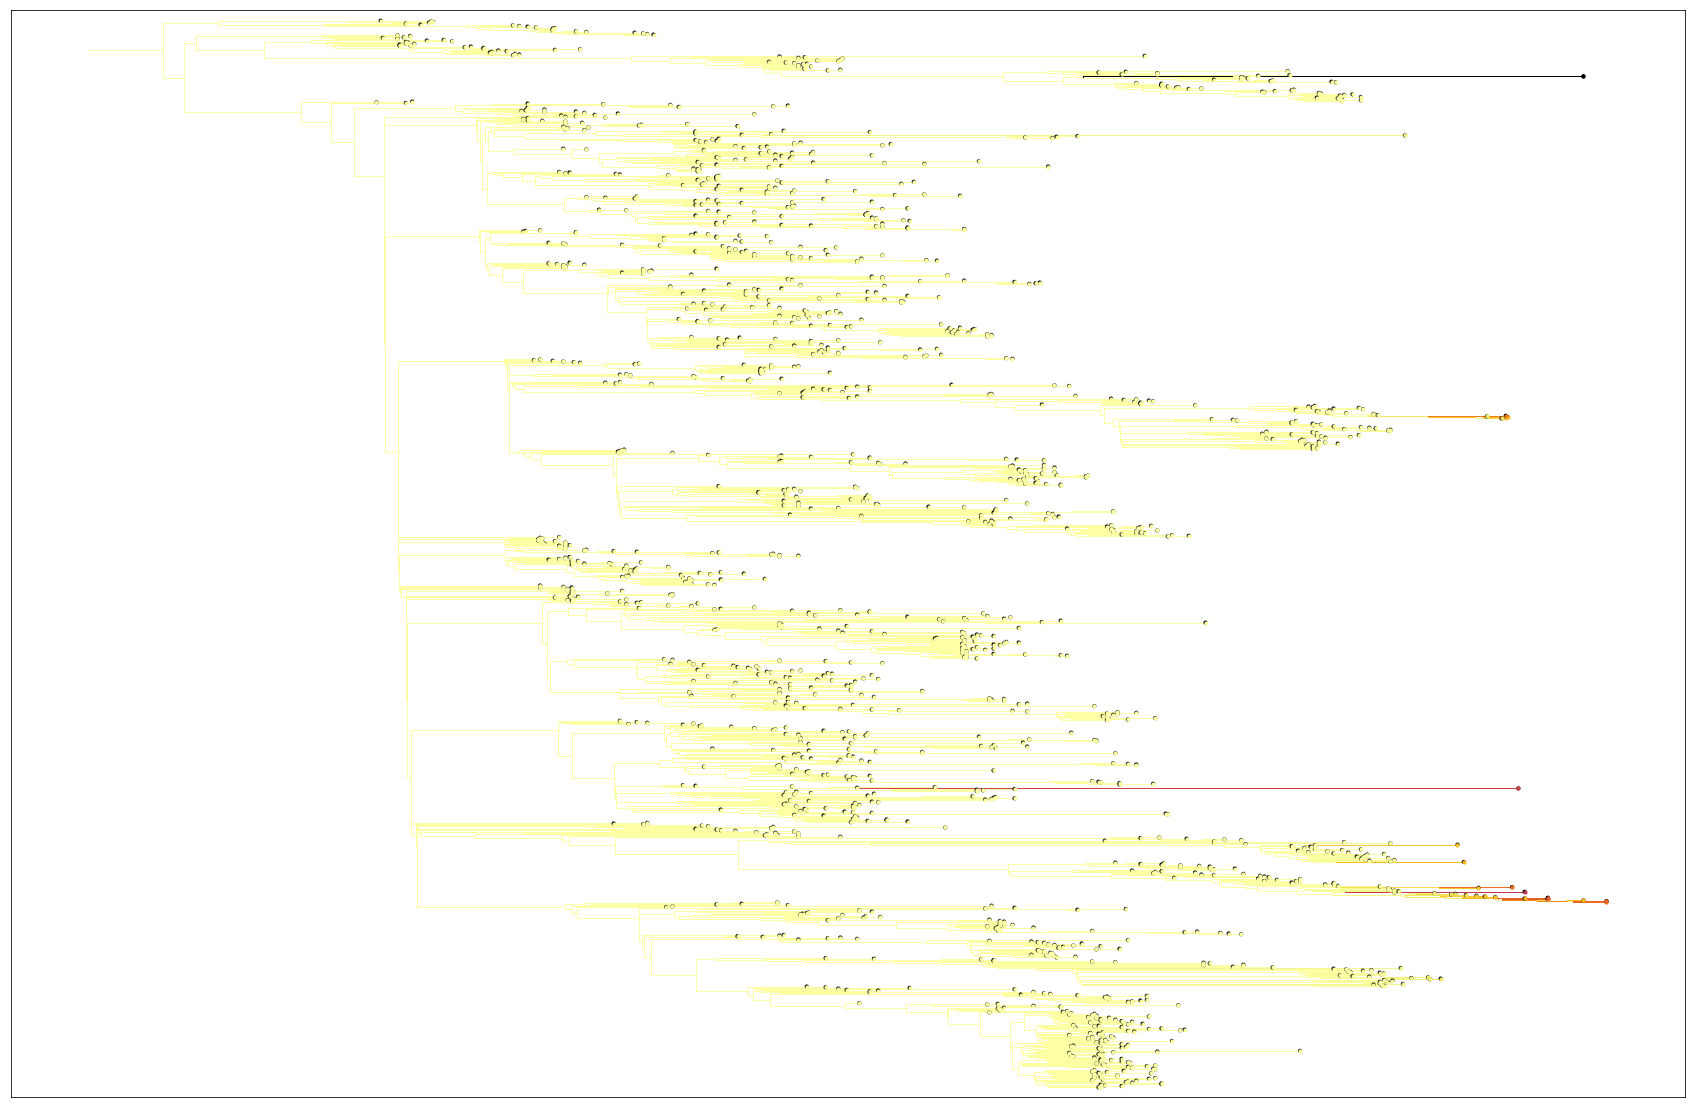

In [32]:
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')

for k in ebov.nodes(): ## iterate over objects in tree
    # positioning
    y=y_positions.get(k) 

    if k.parent_node==None:
        x=0.0
        xp=x-.1
        yp = y_positions.get(k)
    else:
        yp = y_positions.get(k.parent_node)
        xp=k.parent_node.distance_from_root()
        x=k.distance_from_root()
    txt = '' 
    c="k"
    if edge_probs.get(k.edge) != None:
        c = cmap(edge_probs.get(k.edge)/scale_fctr)
    #    txt = round((edge_probs).get(k.edge)*100.0, 2)
    #else:
    #    c = cmap(edge_probs.get(k.parent_node.edge))

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) # plot black circle underneath
    ax.plot([xp,xp],[y, yp],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
    ax.plot([xp,x], [y,y], lw=branchWidth, color=c, ls=lty, zorder=9) #branch plotting
    
    #labeling
   # if txt > .5: #text is already in percentages (this means the new sample has at least a .5% chance of attaching at the specified edge)
   #     ax.text(x-.5*(x-xp) + .009, y, txt, va = 'bottom', ha= 'center', size=12, color = 'k', weight = 'bold')

#plt.axvline(samp_dist, c = "lightgrey")   

ax.set_ylim(-15, y_ax + 15)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

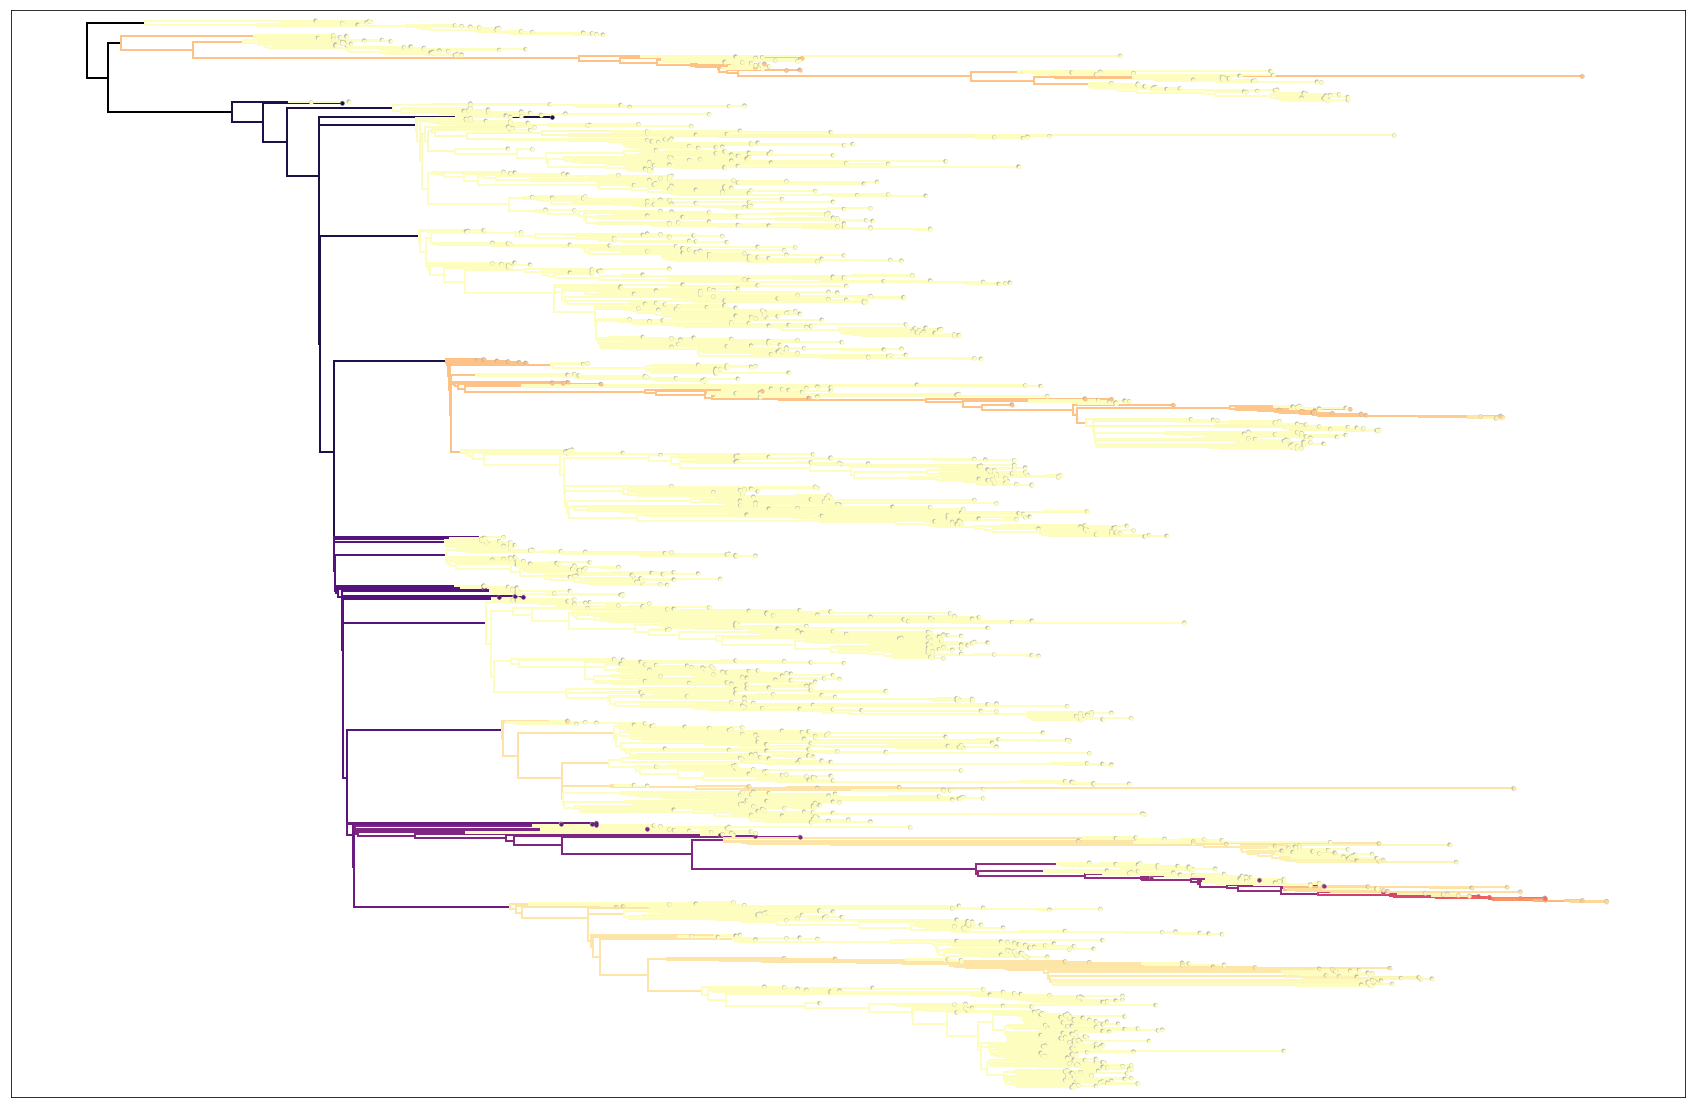

In [34]:
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
branchWidth =2
for k in ebov.nodes(): ## iterate over objects in tree
    # positioning
    y=y_positions.get(k) 

    if k.parent_node==None:
        x=0.0
        xp=x-.1
        yp = y_positions.get(k)
    else:
        yp = y_positions.get(k.parent_node)
        xp=k.parent_node.distance_from_root()
        x=k.distance_from_root()
    
    #txt = '' 
    c="k"
    if node_probs.get(k) != None:
        c = cm2(node_probs.get(k))
    else:
        c = cm2(node_probs.get(k.parent_node))

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        
    else:
        yc1 = y_positions.get(k.child_nodes()[0])
        yc2 = y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls='-',zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls='-', zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls='-', zorder=9) #plot bottom child edge

ax.set_ylim(-15, y_ax + 15)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#fig.savefig('full-ebov-cumulative.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [45]:
samp_dist = ebov.nodes()[1381].distance_from_root()
partial_pcoal = pcoal_along_edge(tree=ebov, popsize = 1, cut_dist_from_root = samp_dist)

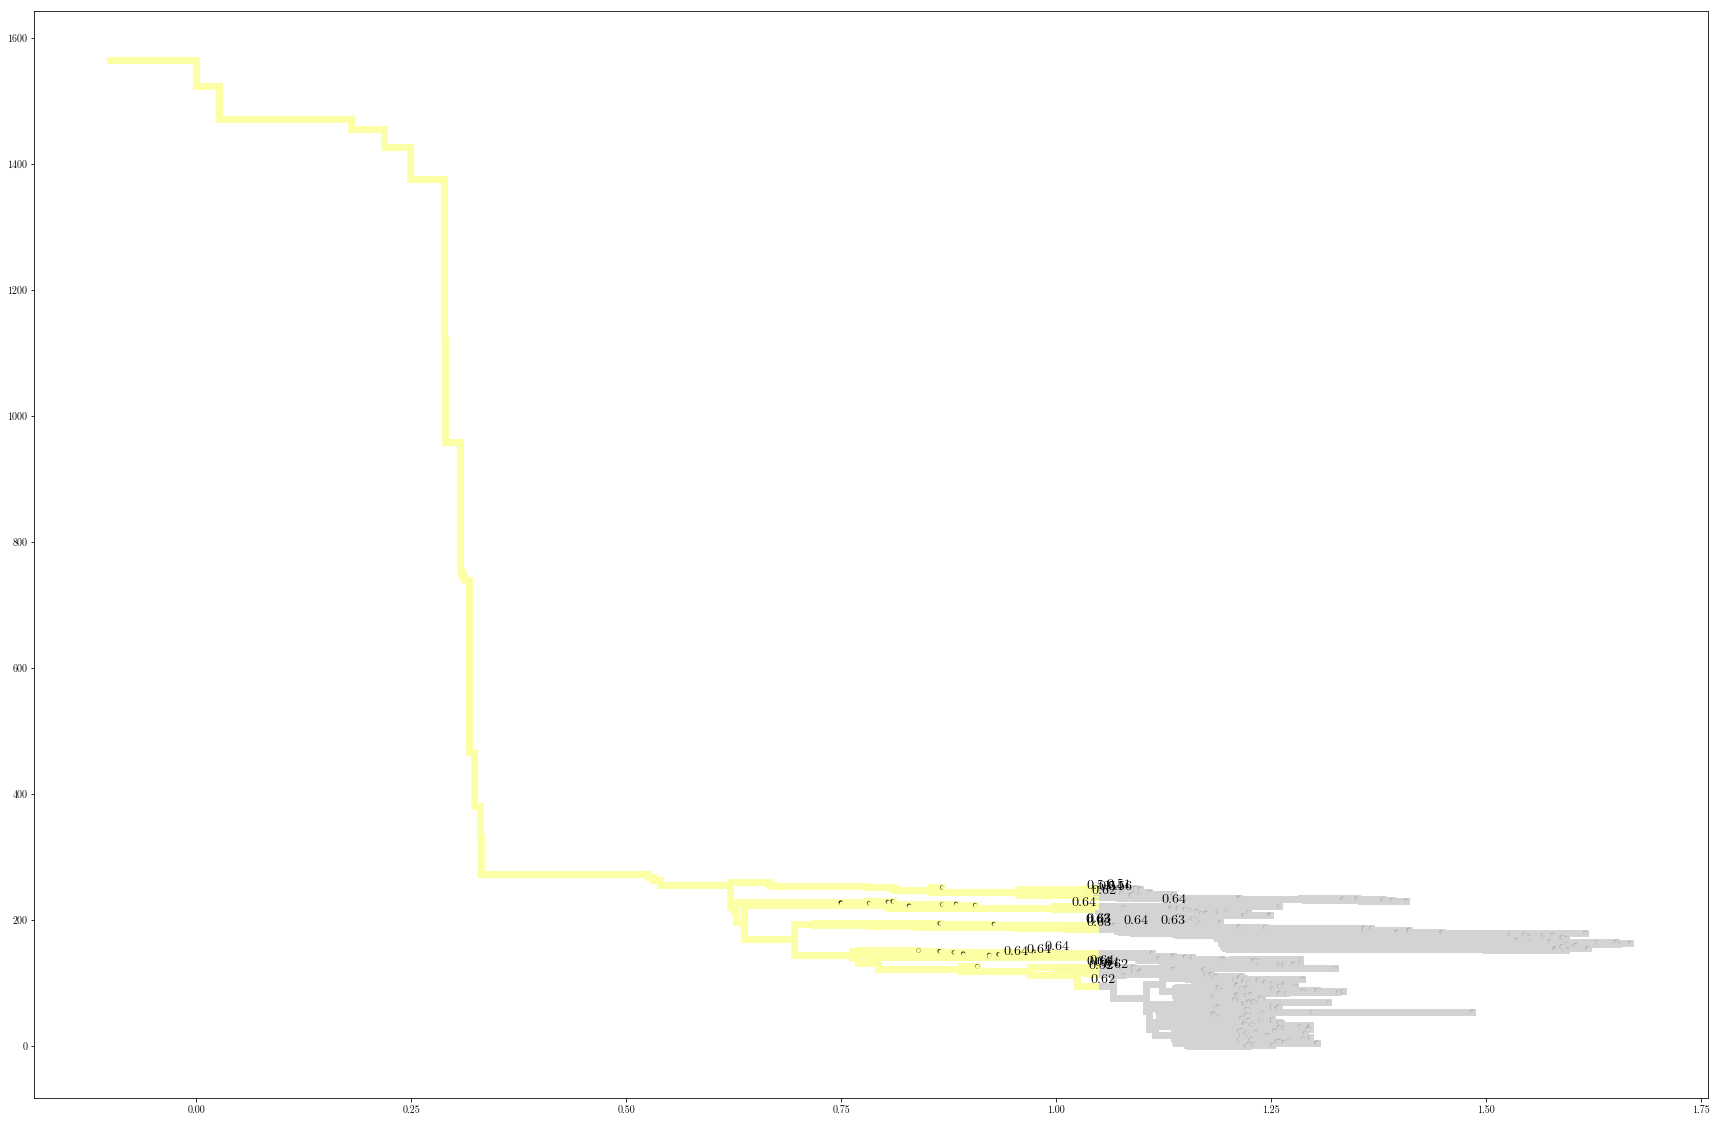

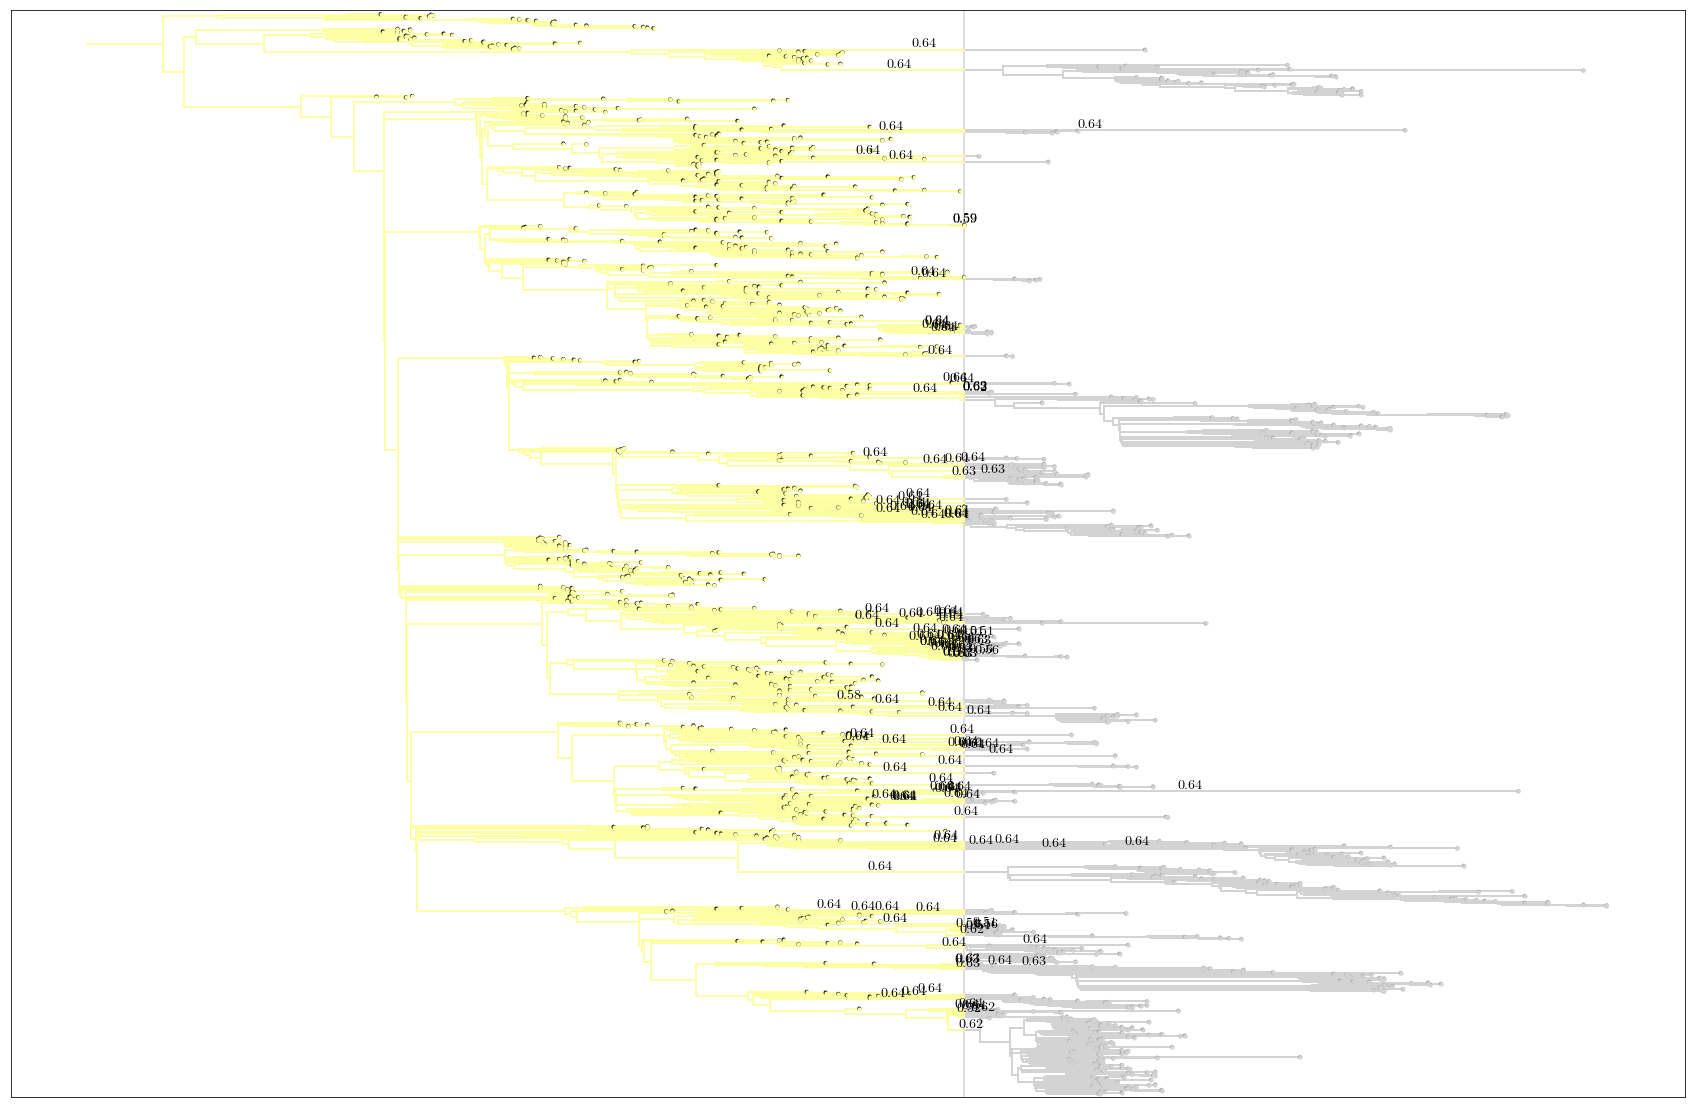

In [46]:
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
branchWidth=2
for k in ebov.nodes(): ## iterate over objects in tree
    # positioning
    y=y_positions.get(k) 

    if k.parent_node==None:
        x=0.0
        xp=x-.1
        yp = y_positions.get(k)
    else:
        yp = y_positions.get(k.parent_node)
        xp=k.parent_node.distance_from_root()
        x=k.distance_from_root()
    txt = ''  
    if partial_pcoal.get(k.edge) != None:
        c = cmap(partial_pcoal.get(k.edge))
        txt = round(partial_pcoal.get(k.edge)*100.0, 2)
    else:
        c = cmap(partial_pcoal.get(k.parent_node.edge))
 
    if x > samp_dist and xp > samp_dist:
        if k.is_leaf(): # if leaf...
            ax.scatter(x,y,s=s,facecolor='lightgrey',edgecolor='lightgrey',zorder=11) # plot circle for every tip
            ax.scatter(x,y,s=s+0.8*s,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        ax.plot([xp,xp],[y, yp],lw=branchWidth, color='lightgrey',ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xp,x], [y,y], lw=branchWidth, color='lightgrey', ls=lty, zorder=9) #branch plotting
    elif x < samp_dist and xp < samp_dist:
        if k.is_leaf(): # if leaf...
            ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
            ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) # plot black circle underneath
        ax.plot([xp,xp],[y, yp],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xp,x], [y,y], lw=branchWidth, color=c, ls=lty, zorder=9) #branch plotting
    else:
        if k.is_leaf(): # if leaf...
            ax.scatter(x,y,s=s,facecolor='lightgrey',edgecolor='lightgrey',zorder=11) # plot circle for every tip
            ax.scatter(x,y,s=s+0.8*s,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        ax.plot([xp,xp],[y, yp],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([samp_dist,x], [y,y], lw=branchWidth, color='lightgrey', ls=lty, zorder=9) #branch plotting
        ax.plot([xp,samp_dist], [y,y], lw=branchWidth, color=c, ls=lty, zorder=9) #branch plotting
    
    #labeling
    if txt > .5: #text is already in percentages (this means the new sample has at least a .5% chance of attaching at the specified edge)
        ax.text(x-.5*(x-xp) + .009, y, txt, va = 'bottom', ha= 'center', size=14, color = 'k', zorder=20)

plt.axvline(samp_dist, c = "lightgrey")   

ax.set_ylim(-5, y_ax + 5)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


#fig.savefig('time-slice.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [8]:
rd.seed(100) #for replicability
pruned_dict = randomly_prune_tree(ebov, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp = theoretical_attachment_prob_matrix(pruned_dict.get('full_tree'), pruned_dict.get('pruned_tree'), pruned_dict.get('root_reference'), 
                                   popsize, pruned_dict.get('node_root_dist_full_tree'), pruned_dict.get('dropped_samples'))
obs = observed_attachment_prob_matrix(pruned_dict.get('full_tree'), pruned_dict.get('pruned_tree'), pruned_dict.get('dropped_samples'))